In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from itertools import groupby
from datetime import datetime
from operator import itemgetter

In [3]:
def ordered_set(arr):
    res=[]
    for i in arr:
        if i not in res:
            res.append(i)
    return(res)

In [4]:
clicks = pd.read_csv('../data/JD_click_data.csv')

In [5]:
orders=pd.read_csv('../data/JD_order_data.csv')

In [123]:
list_users_clicks = clicks.sort_values(by='user_ID').user_ID.to_numpy()

In [163]:
len(users_longer_100)

7608

In [268]:
users_medium_20=[]
for i,j in groupby(list_users_clicks):
    if len(list(j)) >=3:
        if len(list(j)) <=20 :
            users_medium_20.append(i)
users_medium_20 = users_medium_20[1:]

In [257]:
#users_longer_100=[]
user_=[]
for i,j in groupby(list_users_clicks):
    if len(list(j)) >=500:
        #lenghts.append(len(list(j)))
        user_.append(i)

In [12]:
users_longer_100 = users_longer_100[1:]

In [59]:
def metric1(x):
    l = len(set(x))
    return([l/len(x),l])

In [20]:
import networkx as nx

In [55]:
def metric2(product_chain):  #PATH : should go with the size of the stream
    if len(product_chain)<=1:
        return(0)
    trial_graph = pd.DataFrame(transpose([product_chain[:-1],product_chain[1:]]),columns=['A','B'])
    g = nx.Graph()
    for i, elrow in trial_graph.iterrows():
        g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
    return(nx.algorithms.distance_measures.diameter(g))

In [146]:
def metric3(product_chain): #REVISITS : divided by total length of stream
    n=len(product_chain)
    product_chain.sort()
    pc = [len(list(group))-1 for key, group in groupby(product_chain)]
    pp = sum(pc)
    return([pp,pp/n])
    
    
    

### Simple flow

In [46]:
import time
from bisect import bisect

In [623]:
cks = clicks.loc[clicks['user_ID'].isin(users_longer_100[:1000])].sort_values(by='request_time')

In [269]:
time.ctime()

'Thu Jan 30 17:16:25 2020'

In [461]:
fig = figure(1)
fig.set_size_inches(10,5)
q=1
product_chains=[]
time_chains=[]
metric1_list = []
metric2_list = []
metric3_list = []
metric4_list = []
#metric5_list = []


for pu in users_longer_100[:1000]:


    #obtain product_stream:
    prod_history = cks[cks.user_ID == pu].sort_values(by='request_time').sku_ID.to_numpy()
    
    x = ordered_set(prod_history)
    dic = dict(zip(x, list(range(1,len(x)+1))))
    
    

    #obtain purchase stream
    pur_history = orders[orders.user_ID==pu].sort_values(by="order_date").sku_ID.to_numpy()
    pur_time_history = orders[orders.user_ID==pu].sort_values(by="order_date").order_time.to_numpy()
    aaa = list(prod_history)+list(pur_history)
    x = ordered_set(aaa)
    dic = dict(zip(x, list(range(1,len(x)+1))))
    pur_history = [dic[v] for v in pur_history]
    prod_history = [dic[v] for v in prod_history]
    
    time_history = cks[cks.user_ID == pu].sort_values(by='request_time').request_time.to_numpy()

    #cut the streams based on having purchased a product
    
    sot = []
    sop = []
    n=0
    if len(pur_time_history) >>0:
        for j in pur_time_history:
            new_ = bisect(time_history,j)
            sot.append(time_history[n:new_])
            sop.append(prod_history[n:new_])
            n=new_
    sot.append(time_history[n:])
    sop.append(prod_history[n:])
    sop = [x for x in sop if x != []]
    sot = [x for x in sot if x != []]

    #COMPUTE METRICS HERE:
    for i,j in zip(sop,sot):
        metric4_list.append(metric4(i,j))
        product_final = [key for key,group in groupby(i)]
        metric1_list.append(metric1(i))
        metric2_list.append(metric2(i))
        metric3_list.append(metric3(i))


    """##MUST SORT BEFORE PLOTTING ELSE, THE PURCHASE TIME GETS WEIRD - LEAVE FOR NOW
    prod_history = list(zip(prod_history,[0 for xi in prod_history]))
    pur_history = list(zip(pur_history,[1 for xi in pur_history]))
    a= list(zip(time_history,prod_history))
    b= list(zip(pur_time_history,pur_history))
    aaa = a+b
    final = sorted(aaa,key=itemgetter(0))
    
    prods = [xi[0] for xi in array(final)[:,1]]
    times = array(final)[:,0]
        
    ax = fig.add_subplot(3,5,q)
    
    colours = ['blue','red']
    ax.plot(times,prods,'.',color='teal')
    ax.plot(times,prods,'-',color='teal',alpha=.1)
    ax.plot(pur_time_history,[xi[0] for xi in pur_history],'ro')
    ax.set_xticks([])
    ax.axis('off')
    q=q+1"""
    
savefig('trial_labels.pdf')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



<Figure size 720x360 with 0 Axes>

In [271]:
time.ctime()

'Thu Jan 30 17:44:53 2020'

In [523]:
metric1_l = array(metric1_list)[:,0]
metric3_l = array(metric3_list)[:,1]

In [524]:
metric3_list

[[58, 0.5523809523809524],
 [81, 0.6982758620689655],
 [94, 0.6666666666666666],
 [9, 0.6428571428571429],
 [52, 0.8524590163934426],
 [39, 0.8666666666666667],
 [4, 0.6666666666666666],
 [73, 0.5488721804511278],
 [7, 0.875],
 [18, 0.6923076923076923],
 [9, 0.75],
 [58, 0.7945205479452054],
 [18, 0.6923076923076923],
 [105, 0.7835820895522388],
 [2, 0.5],
 [3, 0.5],
 [11, 0.6875],
 [22, 0.8148148148148148],
 [26, 0.8387096774193549],
 [20, 0.625],
 [200, 0.7407407407407407],
 [191, 0.7047970479704797],
 [154, 0.7777777777777778],
 [75, 0.9615384615384616],
 [91, 0.8272727272727273],
 [32, 0.9142857142857143],
 [73, 0.6576576576576577],
 [258, 0.8514851485148515],
 [111, 0.8809523809523809],
 [69, 0.69],
 [74, 0.6434782608695652],
 [32, 0.6956521739130435],
 [62, 0.6138613861386139],
 [70, 0.660377358490566],
 [10, 0.6666666666666666],
 [52, 0.7222222222222222],
 [16, 0.5714285714285714],
 [82, 0.640625],
 [196, 0.937799043062201],
 [140, 0.9859154929577465],
 [89, 0.7542372881355932],

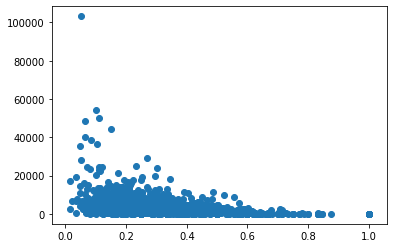

In [465]:
scatter(metric1_l,metric4_list)

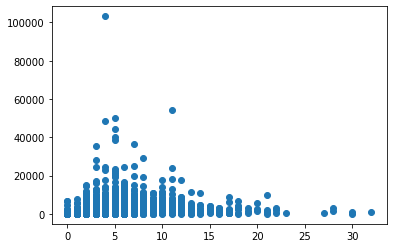

In [466]:
scatter(metric2_list,metric4_list)

Text(0, 0.5, 'Revisit Time')

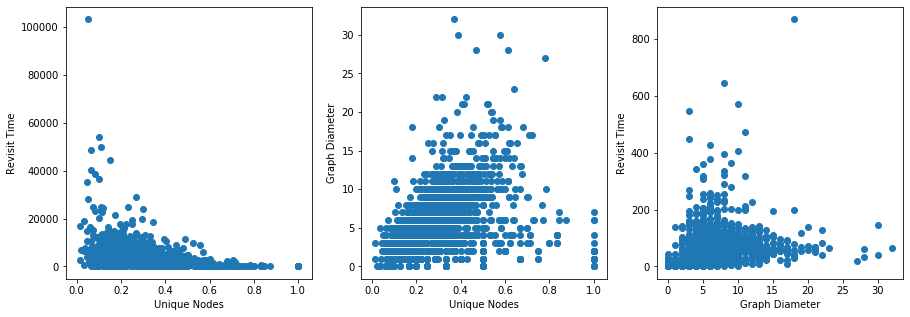

In [502]:
fig = figure(1)
fig.set_size_inches(15,5)
ax = fig.add_subplot(131)
ax.scatter(metric1_l,metric4_list)
#ax.plot(mod.means_[:,0],mod.means_[:,2],'ro')
ax.set_xlabel('Unique Nodes')
ax.set_ylabel('Revisit Time')
ax = fig.add_subplot(132)
ax.scatter(metric1_l,metric2_list)
#ax.plot(mod.means_[:,0],mod.means_[:,1],'ro')
ax.set_xlabel('Unique Nodes')
ax.set_ylabel('Graph Diameter')
ax = fig.add_subplot(133)
ax.scatter(metric2_list,metric3_l)
#ax.plot(mod.means_[:,1],mod.means_[:,2],'ro')
ax.set_xlabel('Graph Diameter')
ax.set_ylabel('Revisit Time')

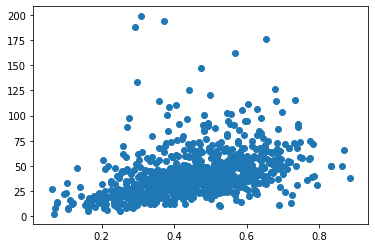

In [573]:
scatter(metric1_list[:962],metric4_list)

In [215]:
#create metric revisit_time:
def metric4(prod,time):
    rev=0
    for i,j in enumerate(prod[:-1]):
        if j==prod[i+1]:
            a,b = datetime.strptime(time[i], '20%y-%m-%d %H:%M:%S'),datetime.strptime(time[i+1], '20%y-%m-%d %H:%M:%S')
            c1 = b-a
            if c1.seconds<=3600:
                rev = rev+(c1.seconds)
    return(rev)
            

In [213]:
revisit_time(sop[1],sot[1])

136

In [201]:
1200/60

20.0

In [189]:
sop[1]

[13, 3, 3, 3, 3, 3, 3, 1, 5, 5, 3, 3, 3, 21, 18, 5]

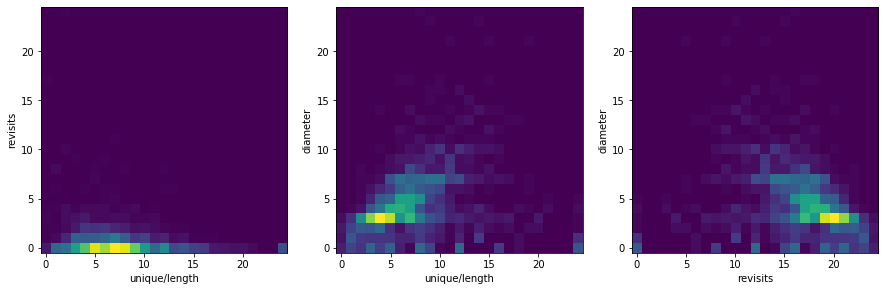

In [470]:
fig = figure(1)
fig.set_size_inches(15,10)
ax = fig.add_subplot(131)
heatmap, xedges, yedges = histogram2d( metric1_l,[xi*yi for xi,yi in zip(metric4_list,metric2_list)],bins=25)
ax.imshow(heatmap.T,  origin='lower')
ax.set_xlabel('unique/length')
ax.set_ylabel('revisits')
ax = fig.add_subplot(132)
heatmap, xedges, yedges = histogram2d( metric1_l,metric2_list,bins=25)
ax.set_xlabel('unique/length')
ax.set_ylabel('diameter')
ax.imshow(heatmap.T,  origin='lower')
ax = fig.add_subplot(133)
heatmap, xedges, yedges = histogram2d( metric3_l,metric2_list,bins=25)
ax.set_xlabel('revisits')
ax.set_ylabel('diameter')
ax.imshow(heatmap.T,  origin='lower')

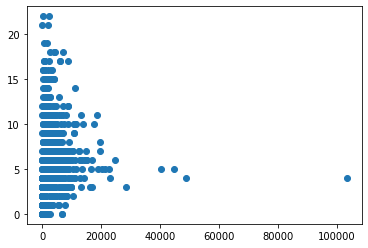

In [273]:
scatter(metric4_list,metric2_list)

In [504]:
shape(metric3_l)

(1630,)

In [479]:
df = pd.DataFrame(transpose([metric1_l[:200],metric2_list[:200],metric3_l[:200],['Purchase' for xi in metric3_l[:200]]]),columns=['A','B','C','D'])
df2 = pd.DataFrame(transpose([metric1_l[200:500],metric2_list[200:500],metric3_l[200:500],['No Purchase' for xi in metric3_l[200:500]]]),columns=['A','B','C','D'])

frames = [df, df2]
result = pd.concat(frames)

#result.to_pickle('trial_df.pkl')

In [538]:
df = pd.DataFrame(transpose([metric1_l,metric2_list,metric3_l,metric4_list,labels]),columns=['A','B','C','D','E'])
df3 = pd.DataFrame(mm,columns=['A','B','C','D','E'])

frames = [df, df3]
result = pd.concat(frames)

result.to_pickle('trial_df.pkl')

In [539]:
result['E'] = result['E'].astype(str)

In [507]:
mm = zeros([2,5])

In [508]:
mm[1][0:4] = mod.means_[1]
mm[0][0:4] = mod.means_[0]

In [509]:
mm[0][4] = 3
mm[1][4] = 3

In [510]:
mm

array([[3.97219730e-01, 6.32589329e+00, 6.02780270e-01, 1.25624229e+03,
        3.00000000e+00],
       [2.33070106e-01, 5.99432343e+00, 7.66929894e-01, 6.64343544e+03,
        3.00000000e+00]])

In [537]:
px.scatter_3d??

In [541]:
import plotly.express as px

In [542]:
fig = px.scatter_3d(result, x='A', y='B', z='C',opacity=0.6,color='E')

#fig = px.scatter_3d(df2, x='A', y='B', z='C',opacity=0.3)
#fig = px.scatter_3d(df, x=mod.means_[:,0], y=mod.means_[:,1], z=mod.means_[:,2])
#fig = px.scatter_3d(df, x='A', y='B', z='C')
fig.show()

In [324]:
from sklearn import mixture
from sklearn.model_selection import StratifiedKFold

In [315]:
shape(transpose([metric1_l,metric2_list,metric3_l]))

(834, 3)

In [530]:
res =[]
for i in range(2,6,1):
    mod = mixture.GaussianMixture(n_components=i, covariance_type='full').fit(transpose([metric1_l,metric2_list,metric3_l,metric4_list]).reshape(-1,4))

    labels = mod.predict(transpose([metric1_l,metric2_list,metric3_l,metric4_list]).reshape(-1,4))

    res.append([i,metrics.silhouette_score(transpose([metric1_l,metric2_list,metric3_l,metric4_list]).reshape(-1,4), labels)])
    #print(i,metrics.davies_bouldin_score(transpose([metric1_l,metric2_list,metric3_l,metric4_list]).reshape(-1,4), labels))

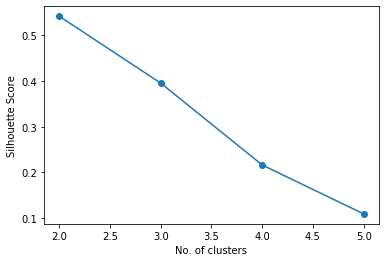

In [534]:
plot([xi[0] for xi in res],[xi[1] for xi in res],'o-')
ylabel('Silhouette Score')
xlabel('No. of clusters')
savefig('ss.pdf')

In [350]:
N = arange(1,11,1)
models = [None for i in range(len(N))]
for i in range(0,10,1):
    models[i] = mixture.GaussianMixture(N[i]).fit(transpose([metric1_l,metric2_list,metric3_l,metric4_list]).reshape(-1,4))

In [352]:
AIC = [m.aic(transpose([metric1_l,metric2_list,metric3_l,metric4_list]).reshape(-1,4)) for m in models]
BIC = [m.bic(transpose([metric1_l,metric2_list,metric3_l,metric4_list]).reshape(-1,4)) for m in models]

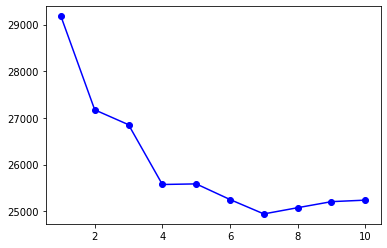

In [353]:
plot(N,BIC,'b-o')

In [333]:
from sklearn.cluster import DBSCAN

In [354]:
from sklearn import metrics

In [366]:
metrics.davies_bouldin_score(transpose([metric1_l,metric2_list,metric3_l,metric4_list]).reshape(-1,4), labels)

0.571102128103248

In [378]:
metrics.silhouette_score(transpose([metric1_l,metric2_list,metric3_l,metric4_list]).reshape(-1,4), labels)

0.9577129537719571

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



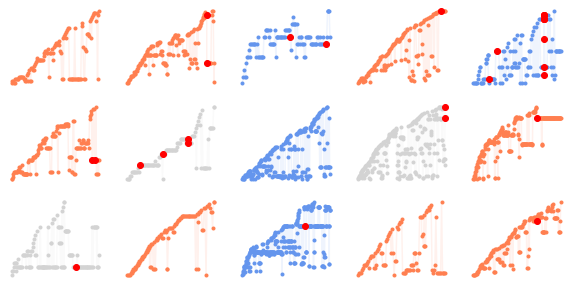

In [459]:
fig = figure(1)
fig.set_size_inches(10,5)
q=1
test = []

stream = []


for pp,pu in enumerate(users_longer_100[1:16]):


    #obtain product_stream:
    prod_history = cks[cks.user_ID == pu].sort_values(by='request_time').sku_ID.to_numpy()
    
    x = ordered_set(prod_history)
    dic = dict(zip(x, list(range(1,len(x)+1))))
    
    

    #obtain purchase stream
    pur_history = orders[orders.user_ID==pu].sort_values(by="order_date").sku_ID.to_numpy()
    pur_time_history = orders[orders.user_ID==pu].sort_values(by="order_date").order_time.to_numpy()
    aaa = list(prod_history)+list(pur_history)
    x = ordered_set(aaa)
    dic = dict(zip(x, list(range(1,len(x)+1))))
    pur_history = [dic[v] for v in pur_history]
    prod_history = [dic[v] for v in prod_history]
    
    time_history = cks[cks.user_ID == pu].sort_values(by='request_time').request_time.to_numpy()

    #cut the streams based on having purchased a product
    
    sot = []
    sop = []
    n=0
    if len(pur_time_history) >>0:
        for j in pur_time_history:
            new_ = bisect(time_history,j)
            sot.append(time_history[n:new_])
            sop.append(prod_history[n:new_])
            n=new_
    sot.append(time_history[n:])
    sop.append(prod_history[n:])
    sop = [x for x in sop if x != []]
    sot = [x for x in sot if x != []]

    #COMPUTE METRICS HERE:
    for i,j in zip(sop,sot):       
        m4 = metric4(i,j)
        product_final = [key for key,group in groupby(i)]
        m1 = metric1(i)[0]
        m2= metric2(i)
        m3 = metric3(i)[1]
        test.append([m1,m2,m3,m4])
        stream.append(pu)


    ##MUST SORT BEFORE PLOTTING ELSE, THE PURCHASE TIME GETS WEIRD - LEAVE FOR NOW
    prod_history = list(zip(prod_history,[0 for xi in prod_history]))
    pur_history = list(zip(pur_history,[1 for xi in pur_history]))
    a= list(zip(time_history,prod_history))
    b= list(zip(pur_time_history,pur_history))
    aaa = a+b
    final = sorted(aaa,key=itemgetter(0))
    
    prods = [xi[0] for xi in array(final)[:,1]]
    times = array(final)[:,0]
        
    ax = fig.add_subplot(3,5,q)
    
    colours = ['blue','red']
    if xxx[pp]==1:
        ax.plot(times,prods,'.',color='cornflowerblue')
        ax.plot(times,prods,'-',color='cornflowerblue',alpha=.1)
    if xxx[pp]==0:
        ax.plot(times,prods,'.',color='coral')
        ax.plot(times,prods,'-',color='coral',alpha=.1)
    if xxx[pp]==3:
        ax.plot(times,prods,'.',color='lightgray')
        ax.plot(times,prods,'-',color='lightgray',alpha=.1)
    ax.plot(pur_time_history,[xi[0] for xi in pur_history],'ro')
    ax.set_xticks([])
    ax.axis('off')
    q=q+1
    
savefig('lab_streams.pdf')

In [446]:
for i in range(len(stream)):
    print(stream[i],mod.predict(array(test[i]).reshape(-1,4)))

0008e2f915 [0]
0012371678 [0]
0012371678 [0]
001282c65e [1]
001282c65e [1]
001282c65e [0]
0025c252c1 [0]
0025c252c1 [1]
00276896ab [1]
00276896ab [1]
00276896ab [1]
00276896ab [1]
00351cc786 [0]
00351cc786 [0]
00351cc786 [0]
00395f3805 [1]
00395f3805 [1]
00395f3805 [0]
00395f3805 [1]
004b21b477 [1]
004c132a3f [0]
00523dd06b [0]
00523dd06b [1]
006d4fb4f4 [0]
006d4fb4f4 [1]
00825ec28f [0]
009b69b3b1 [1]
009b69b3b1 [1]
009d67118d [0]
00af4ea95e [0]
00af4ea95e [1]


In [438]:
len(test)

21

In [458]:
xxx = [0,0,1,0,1,0,3,1,3,0,3,0,1,0,0]